# ベイズの識別規則
- 参考: はじパタ 第3章 ベイズの識別規則
- データを使ってどんな規則か視覚的に理解してみる

**最大事後確率基準**
$$
P\left(C_{i} \mid x\right)=\frac{p\left(x \mid C_{i}\right)}{p(x)} \times P\left(C_{i}\right)
$$
- 左辺: 事後確率 (観測データ $x$ が与えられた下で, それがクラス $C_{i}$ に属する条件付き確率)
- 右辺: 尤度 × 事前確率 / 周辺確率 (すべてデータから計算できる)

In [1]:
# sklearnの乳がんデータセットを用いる
from sklearn.datasets import load_breast_cancer

df, target = load_breast_cancer(return_X_y=True, as_frame=True)
df["y"] = target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
import seaborn as sns
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.4)

<AxesSubplot:xlabel='mean radius', ylabel='Count'>

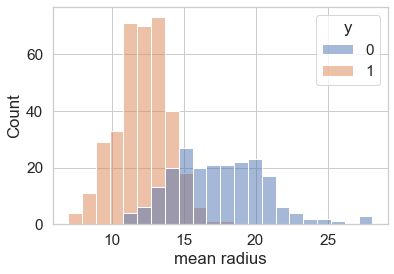

In [3]:
# mean radius (細胞核の平均半径) で悪性(0)/良性(1) を分類することを考える
sns.histplot(data=df, x="mean radius", hue="y")

- 細胞核の平均半径が小さいほど良性
- mean radius = 14 の時、悪性/良性 どちらの確率が高いか？？

$$
P\left(C_{i} \mid x=14\right)=\frac{p\left(x=14 \mid C_{i}\right)}{p(x=14)} \times P\left(C_{i}\right)
$$

→ $P\left(C_{0} \mid x=14\right)$, $P\left(C_{1} \mid x=14\right)$ のうち大きい方のクラスに割り当てる

→ $p(x=14)$ は共通なので、尤度 × 事前確率を比較すれば良い

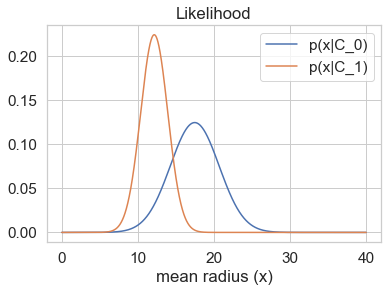

In [4]:
# 尤度を正規分布で近似してみる
mean_0, mean_1 = df.groupby("y")["mean radius"].mean().sort_index()
std_0, std_1 = df.groupby("y")["mean radius"].std().sort_index()

x = np.arange(0, 40, 0.01)

data_0 = norm.pdf(x, mean_0, std_0)
data_1 = norm.pdf(x, mean_1, std_1)

plt.plot(x, data_0, label="p(x|C_0)")
plt.plot(x, data_1, label="p(x|C_1)")

plt.title("Likelihood")
plt.xlabel("mean radius (x)")
plt.legend()
plt.show()

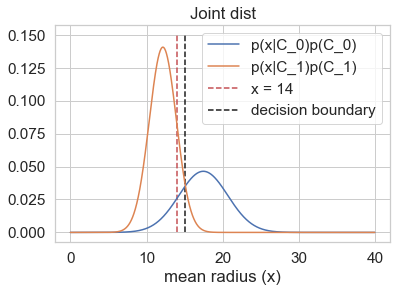

In [5]:
# 事前確率をかける (-> 同時分布)
pri_0, pri_1 = (df["y"].value_counts()/len(df)).sort_index()

plt.plot(x, data_0*pri_0, label="p(x|C_0)p(C_0)")
plt.plot(x, data_1*pri_1, label="p(x|C_1)p(C_1)")

plt.vlines(14, ymin=0, ymax=0.15, color="r", linestyles="--", label="x = 14")
plt.vlines(15.1, ymin=0, ymax=0.15, color="k", linestyles="--", label="decision boundary")

plt.title("Joint dist")
plt.xlabel("mean radius (x)")
plt.legend()
plt.show()

- 細胞核の平均半径が14の時, 良性に分類される
- 平均半径15.1付近が識別境界となる